## Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Loading

In [2]:
cab_df = pd.read_csv(r'C:\Users\SAAD COMMUNICATION\OneDrive\Desktop\G2M Insight Assignment\Cab_Data.csv')
city_df = pd.read_csv(r'C:\Users\SAAD COMMUNICATION\OneDrive\Desktop\G2M Insight Assignment\City.csv')
customer_df = pd.read_csv(r'C:\Users\SAAD COMMUNICATION\OneDrive\Desktop\G2M Insight Assignment\Customer_ID.csv')
transaction_df = pd.read_csv(r'C:\Users\SAAD COMMUNICATION\OneDrive\Desktop\G2M Insight Assignment\Transaction_ID.csv')

In [3]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_df.info

<bound method DataFrame.info of         Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10000012           42375    Pink Cab     ATLANTA GA   
2             10000013           42371    Pink Cab     ATLANTA GA   
3             10000014           42376    Pink Cab     ATLANTA GA   
4             10000015           42372    Pink Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52

In [5]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
city_df.info

<bound method DataFrame.info of                 City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021 >

In [7]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
customer_df.info

<bound method DataFrame.info of        Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
1            27703    Male   27                9237
2            28712    Male   53               11242
3            28020    Male   23               23327
4            27182    Male   33                8536
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[49171 rows x 4 columns]>

In [9]:
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [10]:
transaction_df.info

<bound method DataFrame.info of         Transaction ID  Customer ID Payment_Mode
0             10000011        29290         Card
1             10000012        27703         Card
2             10000013        28712         Cash
3             10000014        28020         Cash
4             10000015        27182         Card
...                ...          ...          ...
440093        10440104        53286         Cash
440094        10440105        52265         Cash
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card

[440098 rows x 3 columns]>

## Data Preprocessing

### Cab Data

In [11]:
# Check for missing values
print("Missing Values in Cab Data:")
print(cab_df.isnull().sum())

Missing Values in Cab Data:
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64


In [12]:
# Check for duplicates
print("Duplicate Entries in Cab Data:")
print(cab_df.duplicated().sum())

Duplicate Entries in Cab Data:
0


In [13]:
# Check for data-type
print(cab_df['Date of Travel'].head())
print(cab_df['Date of Travel'].dtype)

0    42377
1    42375
2    42371
3    42376
4    42372
Name: Date of Travel, dtype: int64
int64


In [14]:
# Check for date range
print(cab_df['Date of Travel'].min(), cab_df['Date of Travel'].max())

42371 43465


In [15]:
# Verify key columns
print(cab_df['City'].unique())
print(cab_df['Company'].unique())
print(cab_df[['Price Charged', 'Cost of Trip']].describe())

['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']
['Pink Cab' 'Yellow Cab']
       Price Charged   Cost of Trip
count  359392.000000  359392.000000
mean      423.443311     286.190113
std       274.378911     157.993661
min        15.600000      19.000000
25%       206.437500     151.200000
50%       386.360000     282.480000
75%       583.660000     413.683200
max      2048.030000     691.200000


In [16]:
# Compute profitability
cab_df['Profit'] = cab_df['Price Charged'] - cab_df['Cost of Trip']

In [17]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


### City Data

In [18]:
# Check for missing values
print("Missing Values in City Data:")
print(city_df.isnull().sum())

Missing Values in City Data:
City          0
Population    0
Users         0
dtype: int64


In [19]:
# Check for duplicates
print("Duplicate Entries in City Data:")
print(city_df.duplicated().sum())

Duplicate Entries in City Data:
0


In [20]:
# Ensure consistent formatting for 'City'
city_df['City'] = city_df['City'].str.strip().str.title()

In [21]:
# Clean Population and Users columns
city_df['Population'] = city_df['Population'].str.replace(',', '').str.strip()
city_df['Users'] = city_df['Users'].str.replace(',', '').str.strip()

In [22]:
# Convert to numeric
city_df['Population'] = pd.to_numeric(city_df['Population'], errors='coerce')
city_df['Users'] = pd.to_numeric(city_df['Users'], errors='coerce')

In [23]:
# Handle missing values
city_df['Population'] = city_df['Population'].fillna(city_df['Population'].median())
city_df['Users'] = city_df['Users'].fillna(city_df['Users'].median())

In [24]:
# Verify the results
print(city_df.dtypes)
print(city_df[['Population', 'Users']].describe())

City          object
Population     int64
Users          int64
dtype: object
         Population          Users
count  2.000000e+01      20.000000
mean   1.231592e+06   64520.650000
std    1.740127e+06   83499.375289
min    2.489680e+05    3643.000000
25%    6.086372e+05   11633.250000
50%    7.845590e+05   23429.000000
75%    1.067041e+06   91766.000000
max    8.405837e+06  302149.000000


### Customer Data

In [25]:
# Check for missing values
print("Missing Values in Customer Data:")
print(customer_df.isnull().sum())

Missing Values in Customer Data:
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


In [26]:
# Check for duplicates
print("Duplicate Entries in Customer Data:")
print(customer_df.duplicated().sum())

Duplicate Entries in Customer Data:
0


In [27]:
# Validate numerical fields
assert customer_df['Income (USD/Month)'].min() > 0, "Invalid income detected."

In [28]:
# Categorize age into groups
bins = [0, 24, 60, 100]
labels = ['Youth', 'Working Age', 'Seniors']
customer_df['Age Group'] = pd.cut(customer_df['Age'], bins=bins, labels=labels)

In [29]:
# Standardize gender formatting
customer_df['Gender'] = customer_df['Gender'].str.strip().str.capitalize()

### Transaction Data

In [30]:
# Check for missing values
print("Missing Values in Transaction Data:")
print(transaction_df.isnull().sum())

Missing Values in Transaction Data:
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


In [31]:
# Check for duplicates
print("Duplicate Entries in Transaction Data:")
print(transaction_df.duplicated().sum())

Duplicate Entries in Transaction Data:
0


In [32]:
print(cab_df.head())
print(transaction_df.head())
print(customer_df.head())
print(city_df.head())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Profit  
0         370.95       313.635  57.315  
1         358.52       334.854  23.666  
2         125.20        97.632  27.568  
3         377.40       351.602  25.798  
4         114.62        97.776  16.844  
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card
   Customer ID Gender  Age  Income (USD/Month)    A

In [33]:
print(cab_df.columns)
print(transaction_df.columns)
print(customer_df.columns)
print(city_df.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Profit'],
      dtype='object')
Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')
Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)', 'Age Group'], dtype='object')
Index(['City', 'Population', 'Users'], dtype='object')


In [34]:
print(cab_df.dtypes)
print(transaction_df.dtypes)
print(customer_df.dtypes)
print(city_df.dtypes)

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
Profit            float64
dtype: object
Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object
Customer ID              int64
Gender                  object
Age                      int64
Income (USD/Month)       int64
Age Group             category
dtype: object
City          object
Population     int64
Users          int64
dtype: object


### Standardization

In [35]:
# Conversion to string type format
cab_df['Transaction ID'] = cab_df['Transaction ID'].astype(str)
transaction_df['Transaction ID'] = transaction_df['Transaction ID'].astype(str)

In [36]:
# Conversion to string type format
transaction_df['Customer ID'] = transaction_df['Customer ID'].astype(str)
customer_df['Customer ID'] = customer_df['Customer ID'].astype(str)

In [37]:
# Conversion to string type format
cab_df['City'] = cab_df['City'].str.strip().str.title()
city_df['City'] = city_df['City'].str.strip().str.title()

In [38]:
# Check for unmatched Transaction IDs
unmatched_transactions = set(cab_df['Transaction ID']) - set(transaction_df['Transaction ID'])
print(f"Unmatched Transaction IDs: {len(unmatched_transactions)}")

Unmatched Transaction IDs: 0


In [39]:
# Check for unmatched Customer IDs
unmatched_customers = set(transaction_df['Customer ID']) - set(customer_df['Customer ID'])
print(f"Unmatched Customer IDs: {len(unmatched_customers)}")

Unmatched Customer IDs: 0


In [40]:
# Check for unmatched Cities
unmatched_cities = set(cab_df['City']) - set(city_df['City'])
print(f"Unmatched Cities: {len(unmatched_cities)}")

Unmatched Cities: 0


### Merge Dataframes & Verify Master Data

In [41]:
merged_data = pd.merge(cab_df, transaction_df, on='Transaction ID', how='inner')

In [42]:
merged_data = pd.merge(merged_data, customer_df, on='Customer ID', how='inner')

In [43]:
master_data = pd.merge(merged_data, city_df, on='City', how='inner')

In [44]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Transaction ID      359392 non-null  object  
 1   Date of Travel      359392 non-null  int64   
 2   Company             359392 non-null  object  
 3   City                359392 non-null  object  
 4   KM Travelled        359392 non-null  float64 
 5   Price Charged       359392 non-null  float64 
 6   Cost of Trip        359392 non-null  float64 
 7   Profit              359392 non-null  float64 
 8   Customer ID         359392 non-null  object  
 9   Payment_Mode        359392 non-null  object  
 10  Gender              359392 non-null  object  
 11  Age                 359392 non-null  int64   
 12  Income (USD/Month)  359392 non-null  int64   
 13  Age Group           359392 non-null  category
 14  Population          359392 non-null  int64   
 15  Users            

In [45]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Age Group,Population,Users
0,10000011,42377,Pink Cab,Atlanta Ga,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,Working Age,814885,24701
1,10351127,43302,Yellow Cab,Atlanta Ga,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,Working Age,814885,24701
2,10412921,43427,Yellow Cab,Atlanta Ga,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,Working Age,814885,24701
3,10000012,42375,Pink Cab,Atlanta Ga,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,Working Age,814885,24701
4,10320494,43211,Yellow Cab,Atlanta Ga,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237,Working Age,814885,24701


In [46]:
print(master_data.duplicated().sum())

0


In [47]:
print(master_data['Transaction ID'].nunique() == len(master_data))

True


In [48]:
print(master_data['Customer ID'].nunique())
print(master_data['City'].nunique())

46148
19


## Feature Engineering

In [49]:
# Profit Margin
master_data['Profit Margin (%)'] = (master_data['Profit'] / master_data['Price Charged']) * 100

In [50]:
# Cost per KM
master_data['Cost per KM'] = master_data['Cost of Trip'] / master_data['KM Travelled']

In [51]:
# Income Bracket
def income_bracket(income):
    if income < 5000:
        return 'Low'
    elif 5000 <= income < 15000:
        return 'Medium'
    else:
        return 'High'

master_data['Income Bracket'] = master_data['Income (USD/Month)'].apply(income_bracket)

In [52]:
# Travel Type
master_data['Travel Type'] = np.where(master_data['KM Travelled'] > 20, 'Long Distance', 'Short Distance') 

In [53]:
# Profit Margin (%)
master_data['Profit Margin (%)'] = (master_data['Profit'] / master_data['Price Charged']) * 100

## Hypothesis Analysis

In [54]:
# Company Distribution
print(master_data['Company'].value_counts())

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64


In [55]:
# Gender Representation
print(master_data['Gender'].value_counts())

Gender
Male      205912
Female    153480
Name: count, dtype: int64


In [56]:
# Payment Modes
print(master_data['Payment_Mode'].value_counts())

Payment_Mode
Card    215504
Cash    143888
Name: count, dtype: int64


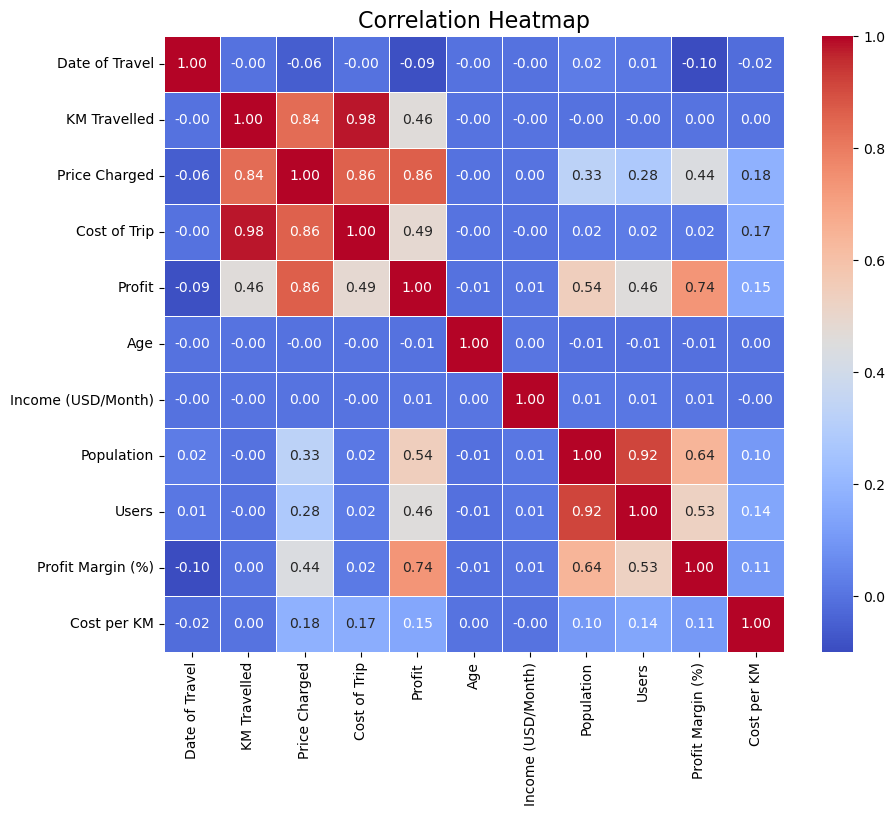

In [57]:
# Select numeric columns only
numeric_data = master_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [58]:
print(master_data['City'].value_counts())

City
New York Ny       99885
Chicago Il        56625
Los Angeles Ca    48033
Washington Dc     43737
Boston Ma         29692
San Diego Ca      20488
Silicon Valley     8519
Seattle Wa         7997
Atlanta Ga         7557
Dallas Tx          7017
Miami Fl           6454
Austin Tx          4896
Orange County      3982
Denver Co          3825
Nashville Tn       3010
Sacramento Ca      2367
Phoenix Az         2064
Tucson Az          1931
Pittsburgh Pa      1313
Name: count, dtype: int64


In [59]:
print(master_data.groupby('City')['Profit'].sum().sort_values(ascending=False))

City
New York Ny       2.796256e+07
Los Angeles Ca    4.411709e+06
Washington Dc     3.492870e+06
Chicago Il        3.387313e+06
Boston Ma         1.768719e+06
San Diego Ca      1.587163e+06
Silicon Valley    1.316705e+06
Dallas Tx         1.128733e+06
Atlanta Ga        8.424329e+05
Miami Fl          7.583012e+05
Seattle Wa        6.046849e+05
Austin Tx         5.267010e+05
Orange County     4.570019e+05
Denver Co         3.975850e+05
Phoenix Az        1.929409e+05
Nashville Tn      1.495322e+05
Tucson Az         1.402607e+05
Sacramento Ca     1.173262e+05
Pittsburgh Pa     8.516596e+04
Name: Profit, dtype: float64


In [60]:
# Top Cities by Population
print(master_data.groupby('City')['Population'].mean().sort_values(ascending=False).head(10))

City
New York Ny       8405837.0
Chicago Il        1955130.0
Los Angeles Ca    1595037.0
Miami Fl          1339155.0
Silicon Valley    1177609.0
Orange County     1030185.0
San Diego Ca       959307.0
Phoenix Az         943999.0
Dallas Tx          942908.0
Atlanta Ga         814885.0
Name: Population, dtype: float64


In [61]:
print(master_data['Customer ID'].value_counts().describe())

count    46148.000000
mean         7.787813
std          9.208328
min          1.000000
25%          2.000000
50%          3.000000
75%         12.000000
max         54.000000
Name: count, dtype: float64


In [62]:
print(master_data['Customer ID'].value_counts().head(10))

Customer ID
494     54
2939    53
1070    51
2766    51
944     50
1628    50
126     50
1803    50
858     50
1067    50
Name: count, dtype: int64


In [63]:
print(master_data['City'].value_counts())

City
New York Ny       99885
Chicago Il        56625
Los Angeles Ca    48033
Washington Dc     43737
Boston Ma         29692
San Diego Ca      20488
Silicon Valley     8519
Seattle Wa         7997
Atlanta Ga         7557
Dallas Tx          7017
Miami Fl           6454
Austin Tx          4896
Orange County      3982
Denver Co          3825
Nashville Tn       3010
Sacramento Ca      2367
Phoenix Az         2064
Tucson Az          1931
Pittsburgh Pa      1313
Name: count, dtype: int64


In [64]:
print(master_data.groupby('City')['Profit'].sum().sort_values(ascending=False))

City
New York Ny       2.796256e+07
Los Angeles Ca    4.411709e+06
Washington Dc     3.492870e+06
Chicago Il        3.387313e+06
Boston Ma         1.768719e+06
San Diego Ca      1.587163e+06
Silicon Valley    1.316705e+06
Dallas Tx         1.128733e+06
Atlanta Ga        8.424329e+05
Miami Fl          7.583012e+05
Seattle Wa        6.046849e+05
Austin Tx         5.267010e+05
Orange County     4.570019e+05
Denver Co         3.975850e+05
Phoenix Az        1.929409e+05
Nashville Tn      1.495322e+05
Tucson Az         1.402607e+05
Sacramento Ca     1.173262e+05
Pittsburgh Pa     8.516596e+04
Name: Profit, dtype: float64


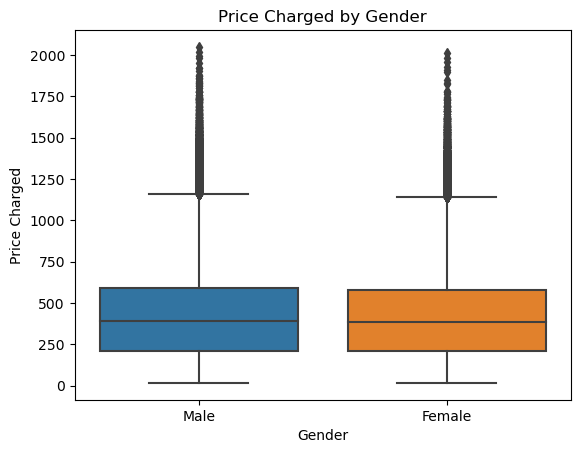

In [65]:
# Income vs Price Charged Group By Gender
sns.boxplot(data=master_data, x='Gender', y='Price Charged')
plt.title('Price Charged by Gender')
plt.show()

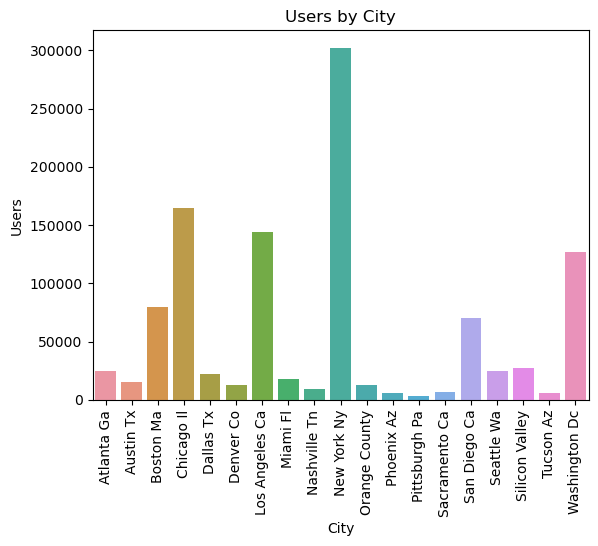

In [66]:
# Distribution of Users across cities
sns.barplot(data=master_data, x='City', y='Users')
plt.xticks(rotation=90)
plt.title('Users by City')
plt.show()

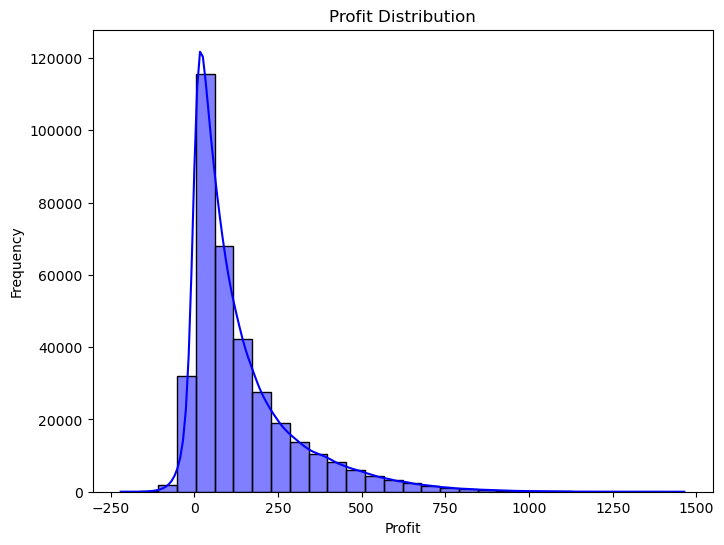

In [67]:
# Profit Distribution
plt.figure(figsize=(8, 6))
sns.histplot(master_data['Profit'], bins=30, kde=True, color='blue')
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

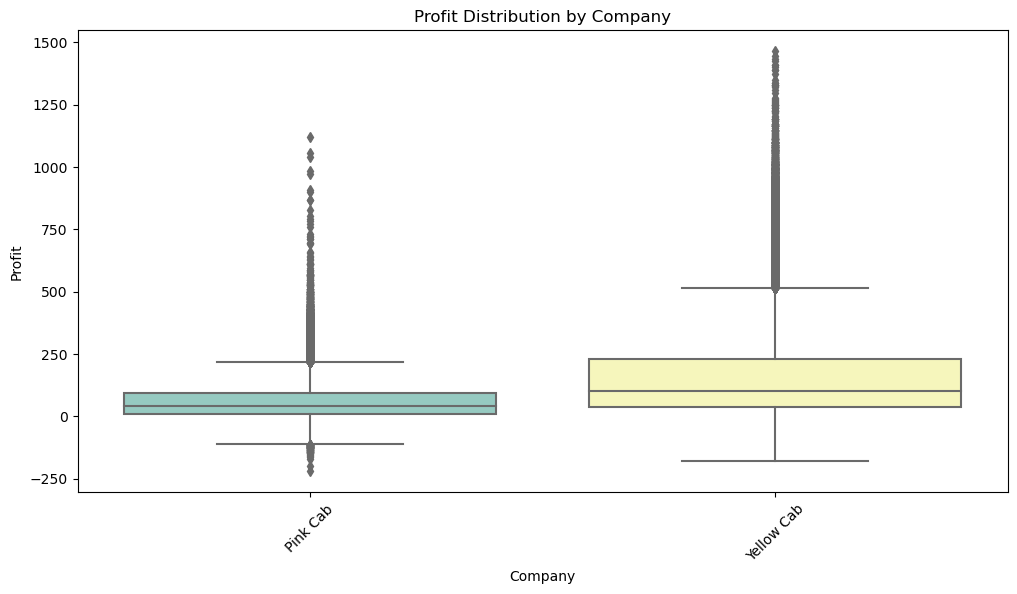

In [68]:
# Profit vs. Company
plt.figure(figsize=(12, 6))
sns.boxplot(x="Company", y="Profit", data=master_data, palette="Set3")
plt.title("Profit Distribution by Company")
plt.xlabel("Company")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()

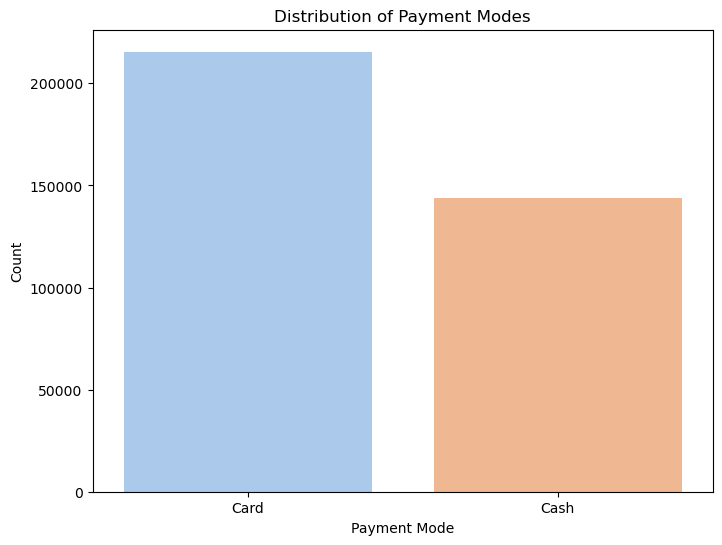

In [69]:
# Distribution of Payment Modes
plt.figure(figsize=(8, 6))
sns.countplot(x="Payment_Mode", data=master_data, palette="pastel")
plt.title("Distribution of Payment Modes")
plt.xlabel("Payment Mode")
plt.ylabel("Count")
plt.show()

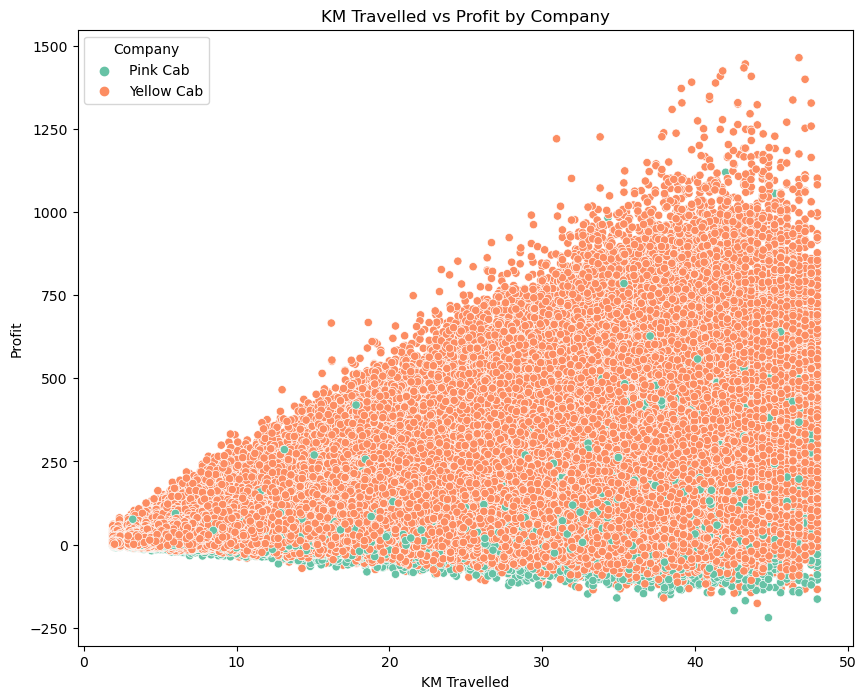

In [70]:
# KM Travelled vs. Profit by Company
plt.figure(figsize=(10, 8))
sns.scatterplot(x="KM Travelled", y="Profit", hue="Company", data=master_data, palette="Set2")
plt.title("KM Travelled vs Profit by Company")
plt.xlabel("KM Travelled")
plt.ylabel("Profit")
plt.legend(title="Company")
plt.show()

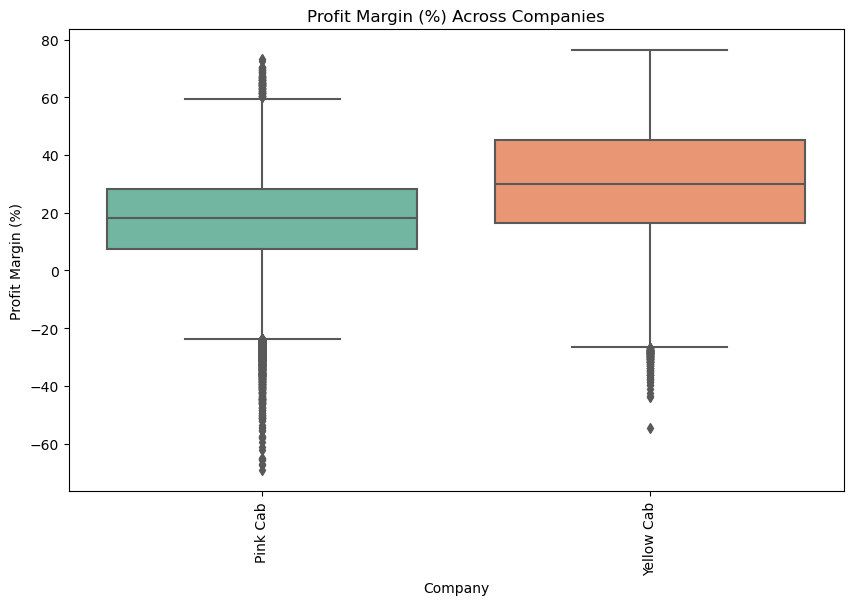

In [71]:
# Profit Margin across different Companies
plt.figure(figsize=(10, 6))
sns.boxplot(data=master_data, x='Company', y='Profit Margin (%)', palette='Set2')
plt.xticks(rotation=90)
plt.title('Profit Margin (%) Across Companies')
plt.show()

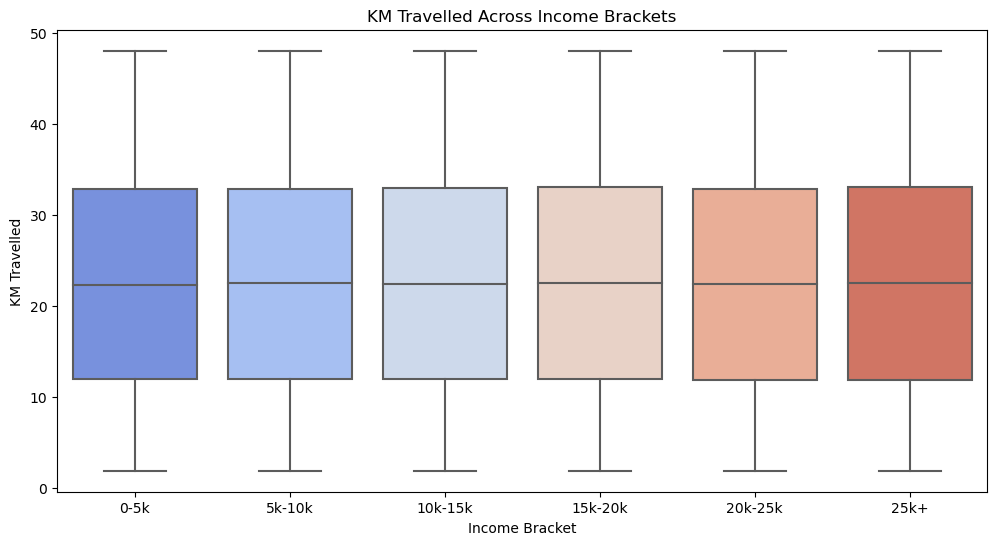

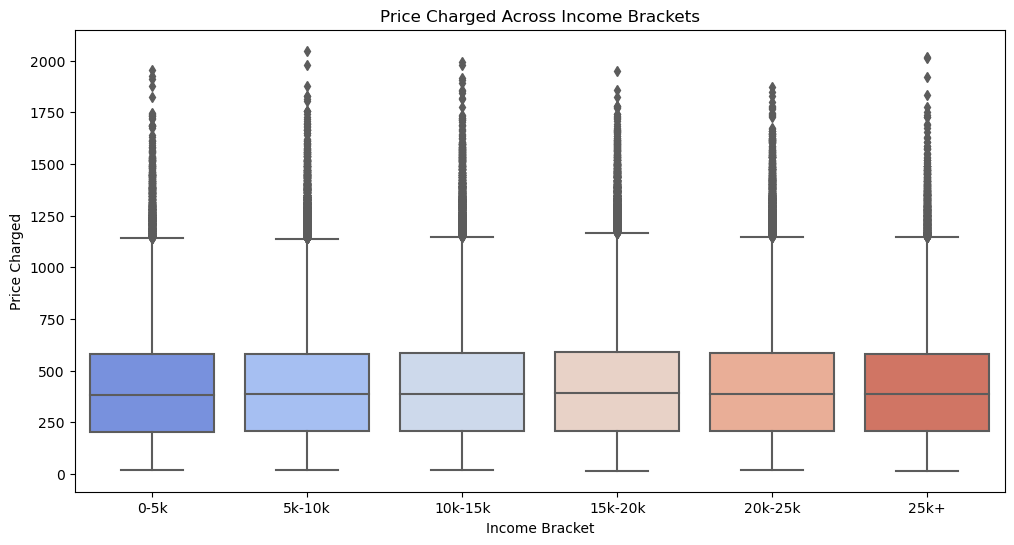

In [72]:
# Create Income Brackets
income_bins = [0, 5000, 10000, 15000, 20000, 25000, np.inf]
income_labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k+']
master_data['Income Bracket'] = pd.cut(master_data['Income (USD/Month)'], bins=income_bins, labels=income_labels)

# Plotting the effect of Income Bracket on KM Travelled and Price Charged
plt.figure(figsize=(12, 6))
sns.boxplot(data=master_data, x='Income Bracket', y='KM Travelled', palette='coolwarm')
plt.title('KM Travelled Across Income Brackets')
plt.show()

# Plotting Price Charged across Income Bracket
plt.figure(figsize=(12, 6))
sns.boxplot(data=master_data, x='Income Bracket', y='Price Charged', palette='coolwarm')
plt.title('Price Charged Across Income Brackets')
plt.show()

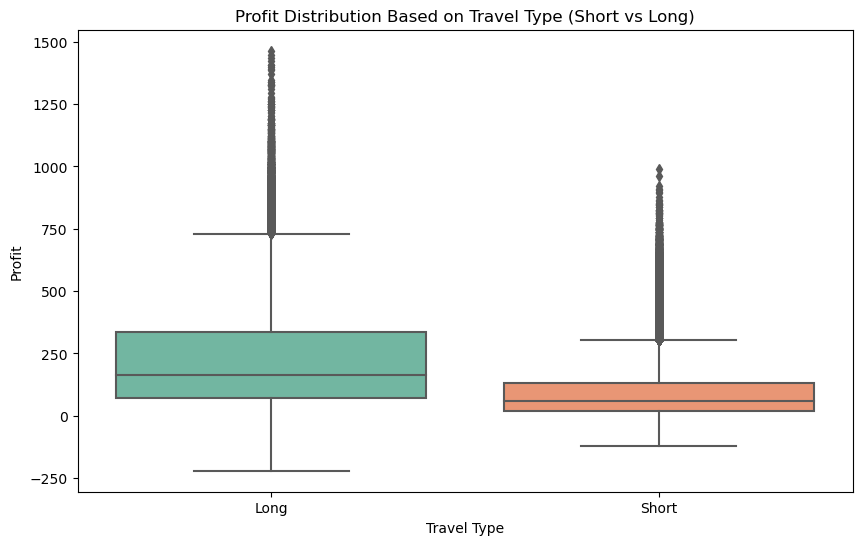

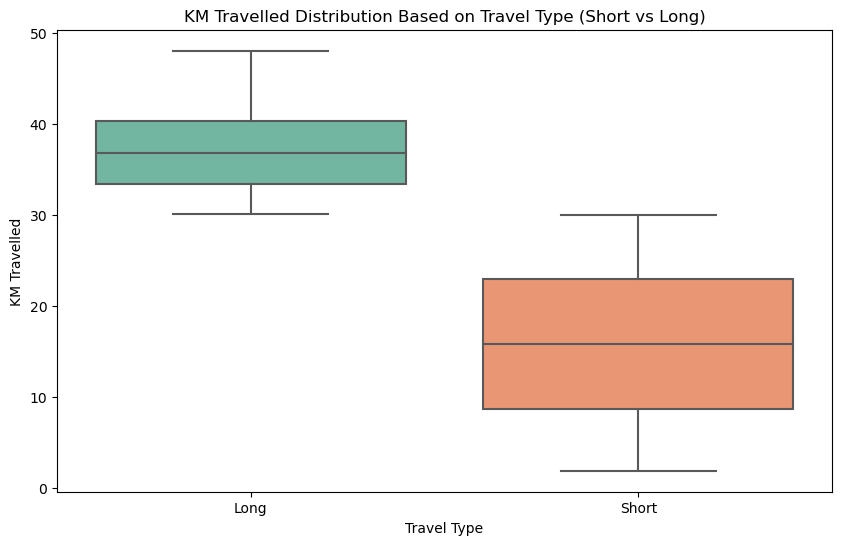

In [73]:
# Create a new column to classify trips as Short or Long
master_data['Travel Type'] = master_data['KM Travelled'].apply(lambda x: 'Short' if x <= 30 else 'Long')

# Plotting Profit based on Travel Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=master_data, x='Travel Type', y='Profit', palette='Set2')
plt.title('Profit Distribution Based on Travel Type (Short vs Long)')
plt.show()

# Plotting KM Travelled distribution based on Travel Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=master_data, x='Travel Type', y='KM Travelled', palette='Set2')
plt.title('KM Travelled Distribution Based on Travel Type (Short vs Long)')
plt.show()